# Treinamento CIS  
## 2º Período  
### Clusterização

**Aluno:** Danilo Silveira da Silva  
**Matrícula:** 222014142


> *1. Apenas com a observação dos dados por meio de tabelas e dataframe,
apresente suas hipóteses*

In [86]:
import pandas as pd

# Carregar o dataset de hábitos e desempenho
df = pd.read_csv('data/student_habits_performance.csv')

# Mostrar uma amostra inicial
df.head()

# Exibir informações gerais do dataset
df.info()

# Estatísticas descritivas iniciais dos dados numéricos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**Hipótese 1:**
1. Impacto do Tempo em Streaming e Redes Sociais:
Estudantes que passam mais horas em plataformas de streaming (coluna netflix_hours) e redes sociais (social_media_hours) tendem a apresentar um desempenho acadêmico inferior, medido pela pontuação no exame (exam_score).

2. Sobrecarga por Atividades Extracurriculares e Trabalho:
A participação em atividades extracurriculares (extracurricular_participation = 'Yes') e/ou trabalho de meio período (part_time_job = 'Yes') pode estar associada a uma redução no desempenho acadêmico, devido à possível sobrecarga de atividades.

3. Nível de Escolaridade dos Pais:
Espera-se que alunos cujos pais têm maior nível de escolaridade (parental_education_level) possam ter um melhor desempenho acadêmico, seja por incentivo familiar ou maior apoio em casa. Entretanto, caso estejam sobrecarregados com múltiplas atividades, o efeito pode ser inverso


> *2. Realize uma EDA da forma que julgar mais adequada;*

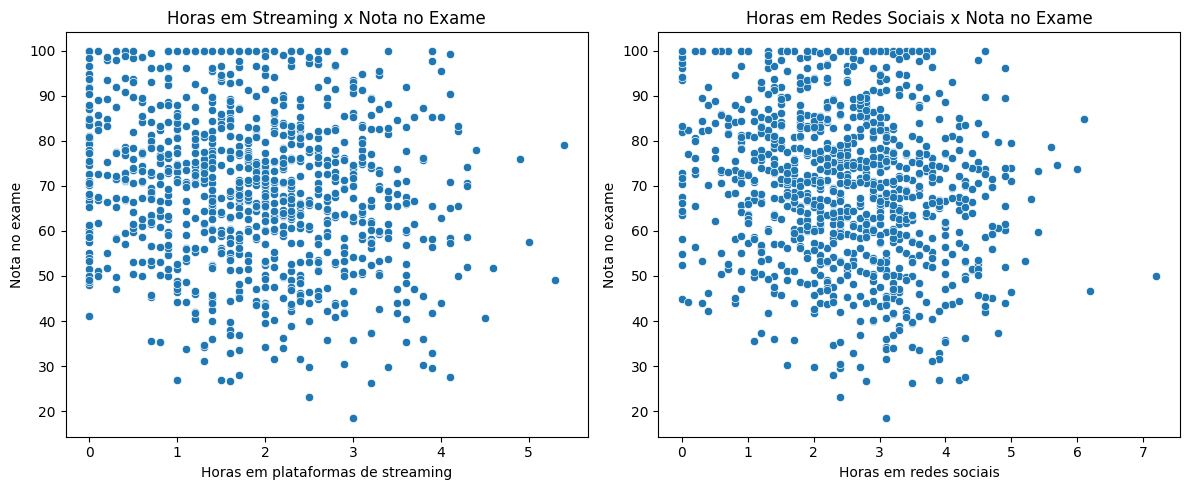

Correlação entre netflix_hours e exam_score: -0.17177923845531576
Correlação entre social_media_hours e exam_score: -0.1667328851086167


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlação entre tempo em plataformas e nota
plt.figure(figsize=(12,5))

# Streaming
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='netflix_hours', y='exam_score')
plt.title('Horas em Streaming x Nota no Exame')
plt.xlabel('Horas em plataformas de streaming')
plt.ylabel('Nota no exame')

# Redes Sociais
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='social_media_hours', y='exam_score')
plt.title('Horas em Redes Sociais x Nota no Exame')
plt.xlabel('Horas em redes sociais')
plt.ylabel('Nota no exame')

plt.tight_layout()
plt.show()

# Calcular correlação
print('Correlação entre netflix_hours e exam_score:', df['netflix_hours'].corr(df['exam_score']))
print('Correlação entre social_media_hours e exam_score:', df['social_media_hours'].corr(df['exam_score']))


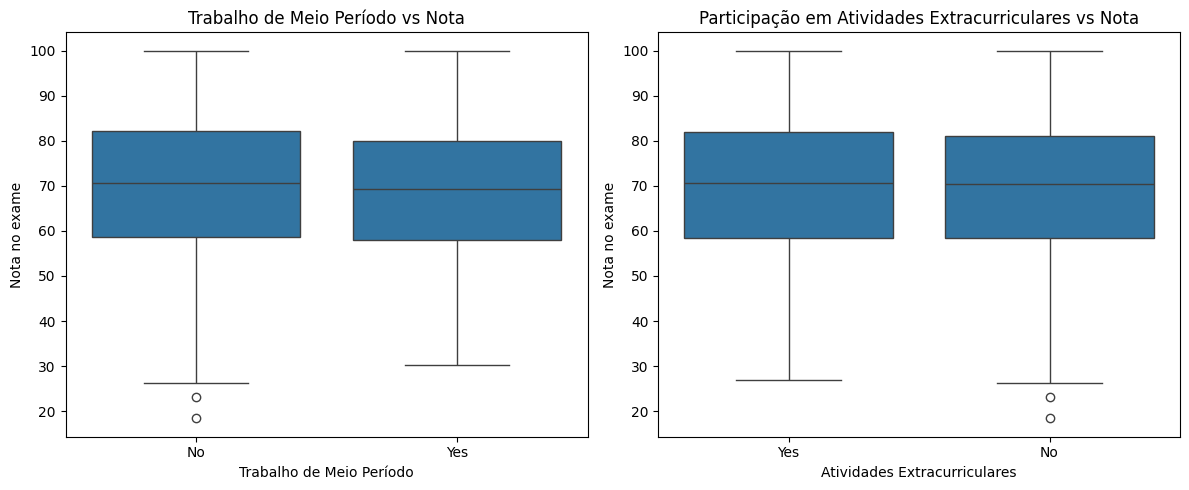

part_time_job
No     69.836561
Yes    68.743256
Name: exam_score, dtype: float64
extracurricular_participation
No     69.591349
Yes    69.623270
Name: exam_score, dtype: float64


In [88]:
# Boxplot para comparar notas de quem trabalha ou faz atividades extracurriculares

plt.figure(figsize=(12,5))

# Trabalho de meio período
plt.subplot(1,2,1)
sns.boxplot(data=df, x='part_time_job', y='exam_score')
plt.title('Trabalho de Meio Período vs Nota')
plt.xlabel('Trabalho de Meio Período')
plt.ylabel('Nota no exame')

# Atividades extracurriculares
plt.subplot(1,2,2)
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score')
plt.title('Participação em Atividades Extracurriculares vs Nota')
plt.xlabel('Atividades Extracurriculares')
plt.ylabel('Nota no exame')

plt.tight_layout()
plt.show()

# Médias
print(df.groupby('part_time_job')['exam_score'].mean())
print(df.groupby('extracurricular_participation')['exam_score'].mean())

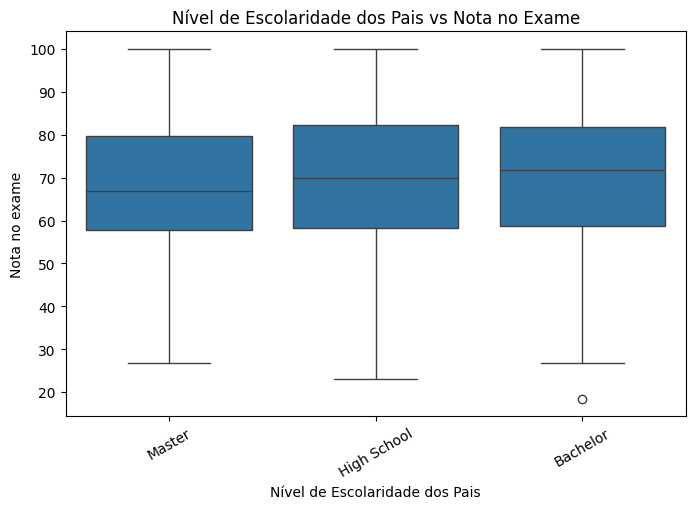

parental_education_level
Bachelor       70.272571
High School    69.547194
Master         68.086826
Name: exam_score, dtype: float64


In [89]:
# Se parental_education_level for categórica (Ex: 'Fundamental', 'Médio', 'Superior'), plotar boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.title('Nível de Escolaridade dos Pais vs Nota no Exame')
plt.xlabel('Nível de Escolaridade dos Pais')
plt.ylabel('Nota no exame')
plt.xticks(rotation=30)
plt.show()

# Média das notas por nível de escolaridade dos pais
print(df.groupby('parental_education_level')['exam_score'].mean())


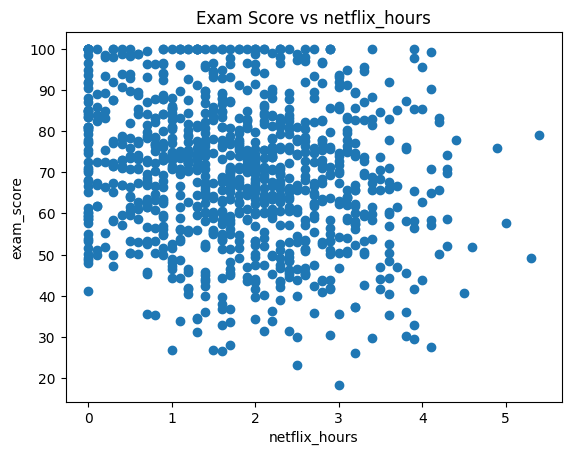

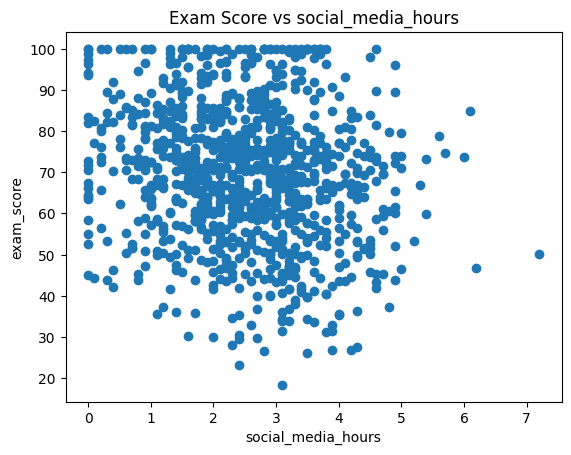

In [90]:
# Scatterplots de exame vs horas em mídia
for col in ['netflix_hours', 'social_media_hours']:
    plt.figure()
    plt.scatter(df[col], df['exam_score'])
    plt.title(f"Exam Score vs {col}")
    plt.xlabel(col)
    plt.ylabel("exam_score")
    plt.show()

In [91]:
# Selecionar apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
corr_matrix = numeric_cols.corr()

# Exibir as correlações da coluna exam_score, ordenadas do maior para o menor (em valor absoluto)
exam_corr = corr_matrix['exam_score'].drop('exam_score').sort_values(key=abs, ascending=False)

print("Correlação das variáveis numéricas com exam_score:")
display(exam_corr)



Correlação das variáveis numéricas com exam_score:


study_hours_per_day      0.825419
mental_health_rating     0.321523
netflix_hours           -0.171779
social_media_hours      -0.166733
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
Name: exam_score, dtype: float64

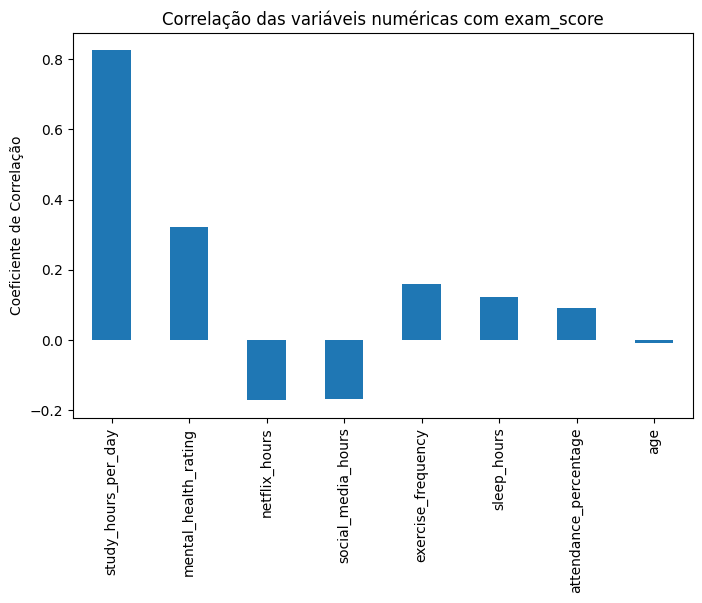

In [92]:
plt.figure(figsize=(8,5))
exam_corr.plot(kind='bar')
plt.title('Correlação das variáveis numéricas com exam_score')
plt.ylabel('Coeficiente de Correlação')
plt.show()


> *3. Com base na EDA realizada, revise as suas hipóteses a respeito do dados;*

Após a análise das correlações entre as variáveis e a nota do exame (`exam_score`), observamos que a hipótese 1, que sugeria uma forte relação negativa entre o tempo gasto em plataformas de streaming e redes sociais e o desempenho acadêmico, **não foi confirmada**. As variáveis `netflix_hours` e `social_media_hours` apresentaram correlações negativas muito baixas com a nota do exame (em torno de -0,17), indicando que o tempo nessas plataformas não está fortemente associado a uma queda significativa no desempenho acadêmico dos alunos analisados.

Por outro lado, os resultados apontam que as variáveis que **mais influenciam a nota do aluno** são o tempo dedicado aos estudos (`study_hours_per_day`, com correlação de 0,82) e o índice de saúde mental do estudante (`mental_health_rating`, com correlação de 0,32). Ou seja, alunos que estudam mais horas por dia e que possuem uma melhor saúde mental tendem a ter notas mais altas no exame. Assim, é possivel formular a **hipótese 2:** a saúde mental do estudante e o tempo dedicado aos estudos são os habitos que influenciam na nota do exame. Fatores como tempo utilizando rede sociais e participação em atividades extracurricular não tem impacto direto na nota.  

Dessa forma, a hipótese 2 se mostra mais consistente com os dados, evidenciando que o desempenho acadêmico está mais relacionado a bons hábitos de estudo e à saúde mental do que ao simples tempo gasto em entretenimento digital.


> *4. Construa um algoritmo de K-Means from scratch utilizando a linguagem Python;*

In [103]:
import numpy as np

def kmeans_from_scratch(X, k, max_iters=100, random_state=42):
    """
    Algoritmo de K-Means implementado do zero.
    
    Parâmetros:
    X: pd.DataFrame
        Dados de entrada, onde cada linha é uma amostra e cada coluna é uma feature.
    k: int
        Número de clusters desejados.
    max_iters: int
        Número máximo de iterações permitidas para o algoritmo.
    random_state: int
        Semente para geração dos centróides iniciais de forma reproduzível.
    
    Retornos:
    centroids: np.ndarray
        Array com os centróides finais (k x n_features).
    labels: np.ndarray
        Array indicando o cluster de cada amostra (tamanho n_samples).
    inertia: float
        Soma das distâncias quadradas das amostras ao centróide mais próximo (criterio de avaliação do K-Means).
    """
    np.random.seed(random_state)
    X = np.array(X)
    n_samples, n_features = X.shape

    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    inertia = np.sum((X - centroids[labels]) ** 2)

    return centroids, labels, inertia


> *5. Apresente a justificativa de forma discursiva e por meio de cálculos, o valor de K utilizado;*


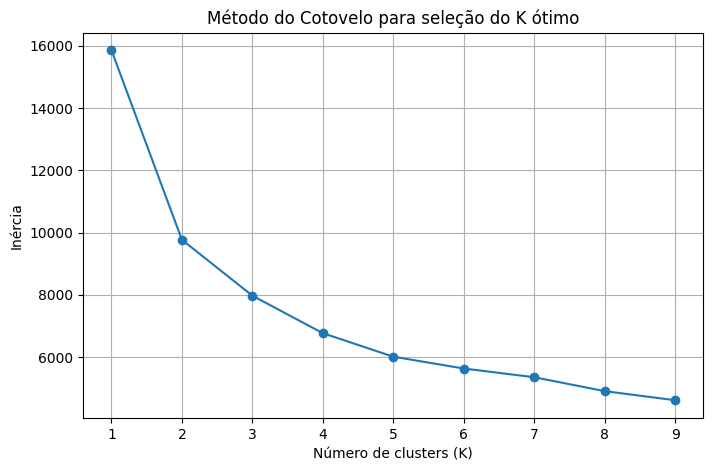

In [105]:
# Escolha das colunas (features) para clusterização: hábitos e fatores com maior correlação
feature_cols = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours']
features = df[feature_cols]

inertias = []
ks = range(1, 10)

for k in ks:
    centroids, labels, inertia = kmeans_from_scratch(features, k)
    inertias.append(inertia)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(ks, inertias, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para seleção do K ótimo')
plt.xticks(ks)
plt.grid(True)
plt.show()


Para definir o número ideal de clusters (K), utilizei o método do cotovelo. O procedimento consiste em executar o algoritmo de K-Means para diferentes valores de K e analisar o comportamento da inércia (soma das distâncias quadradas dos pontos ao seu centróide mais próximo).

À medida que aumentamos o valor de K, a inércia tende a diminuir, pois os pontos ficam mais próximos dos centróides. Entretanto, a partir de certo ponto, o ganho em explicação dos dados passa a ser pequeno, e esse ponto é chamado de "cotovelo". O valor de K correspondente ao cotovelo é considerado o mais adequado, pois representa o melhor equilíbrio entre a simplicidade do modelo e a capacidade de explicar a estrutura dos dados.

No gráfico acima, observamos que o ponto de inflexão ocorre em **K = 2**. Após esse valor, a redução da inércia se torna significativamente menor, indicando que **2 clusters** é a escolha mais apropriada para segmentar os estudantes com base nos hábitos analisados.


> *6. Revise as hipóteses levantadas no exercício 1 e 2 e com base no algoritmo desenvolvido, apresente análise crítica a respeito das informações extraídas dos dados caso o algoritmo refute ou confirme suas hipóteses;*


In [108]:
feature_cols = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours']
features = df[feature_cols]

# Execute o K-Means com K=2 usando as features já definidas
centroids, labels, inertia = kmeans_from_scratch(features, k=2)

# Adicione os rótulos dos clusters ao dataframe original
df['cluster'] = labels

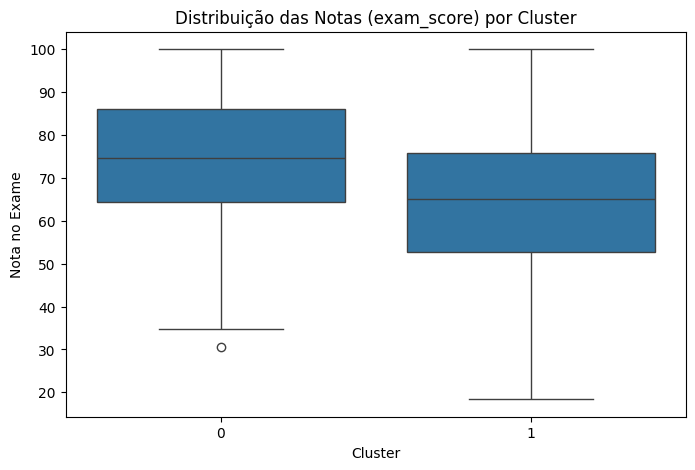

In [110]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='cluster', y='exam_score')
plt.title('Distribuição das Notas (exam_score) por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nota no Exame')
plt.show()


In [111]:
# Visualizar médias dos hábitos em cada cluster
habits = ['study_hours_per_day', 'mental_health_rating', 'exercise_frequency', 'sleep_hours']
cluster_means = df.groupby('cluster')[habits + ['exam_score']].mean()
display(cluster_means)


,study_hours_per_day,mental_health_rating,exercise_frequency,sleep_hours,exam_score
cluster,,,,,
0,3.584490,7.955102,3.004082,6.468571,74.842857
1,3.517059,3.019608,3.078431,6.471569,64.565686


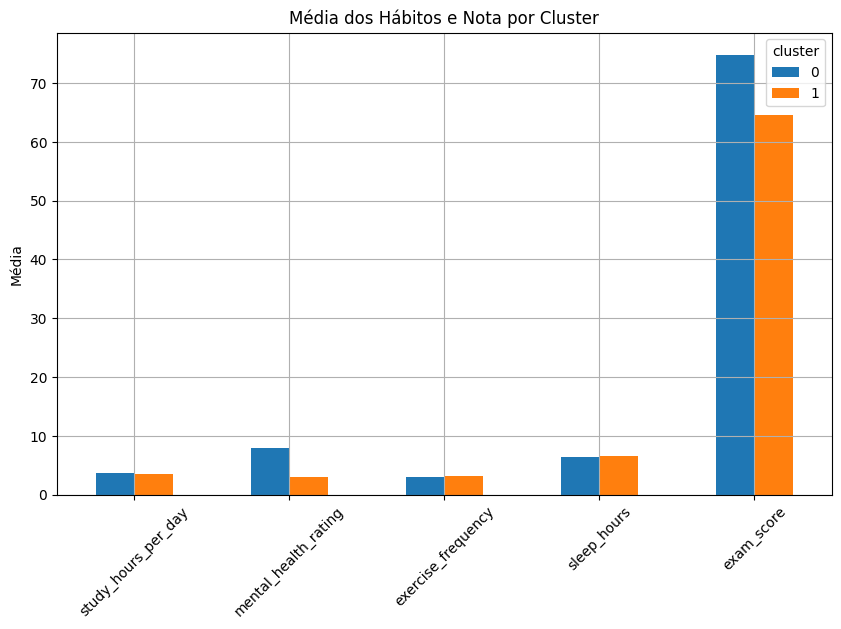

In [112]:
cluster_means[habits + ['exam_score']].T.plot(kind='bar', figsize=(10,6))
plt.title('Média dos Hábitos e Nota por Cluster')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Após aplicar o algoritmo de K-Means com K=2, os grupos formados apresentam diferenças bem claras nos hábitos analisados e também no desempenho acadêmico. O **Cluster 0** reúne estudantes que possuem, em média, melhores índices de saúde mental (`mental_health_rating` = 7.96) e notas mais altas no exame (`exam_score` = 74.84). Já o **Cluster 1** agrupa estudantes com índices significativamente mais baixos de saúde mental (`mental_health_rating` = 3.02) e desempenho acadêmico inferior (`exam_score` = 64.57).

Apesar de ambos os grupos apresentarem médias semelhantes em relação ao tempo de estudo diário, frequência de exercícios e horas de sono, o que realmente se destaca é o impacto da **saúde mental** sobre o desempenho acadêmico. Os resultados confirmam que o fator que mais diferencia os grupos é a saúde mental, e não necessariamente o tempo de estudo ou outros hábitos analisados. Assim, a hipótese revisada — de que a saúde mental é um fator fundamental para o rendimento dos alunos — é confirmada pelo agrupamento dos dados.

Visualmente e numericamente, fica claro que investir em saúde mental pode ser tão ou mais importante do que focar apenas em hábitos de estudo para obter melhores resultados acadêmicos.
